# Importing Libraries

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Importing Data 

In [280]:
df=pd.read_csv("https://github.com/dsrscientist/dataset3/raw/main/glass.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [281]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [282]:
columns=["Id_number","refractive_index","Sodium","Magnesium","Aluminum","Silicon","Potassium",
"Calcium","Barium","Iron","Type_glass"]
columns

['Id_number',
 'refractive_index',
 'Sodium',
 'Magnesium',
 'Aluminum',
 'Silicon',
 'Potassium',
 'Calcium',
 'Barium',
 'Iron',
 'Type_glass']

In [283]:
df.columns=columns

In [284]:
df.dtypes

Id_number             int64
refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_glass            int64
dtype: object

In [285]:
df.head()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_number         214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type_glass        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [287]:
df.duplicated().sum()

0

In [288]:
df.shape

(214, 11)

In [289]:
df.isnull().sum()

Id_number           0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_glass          0
dtype: int64

In [290]:
# df.loc[df["Type_glass"]==" "]

# Use describe function for checking Count,Mean,Outliers

In [291]:
df.describe()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [292]:
df["Type_glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

# check the correlation 

In [293]:
df.corr()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_glass
Id_number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
refractive_index,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Sodium,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Magnesium,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Aluminum,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Silicon,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
Potassium,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Calcium,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Barium,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Iron,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


<AxesSubplot: >

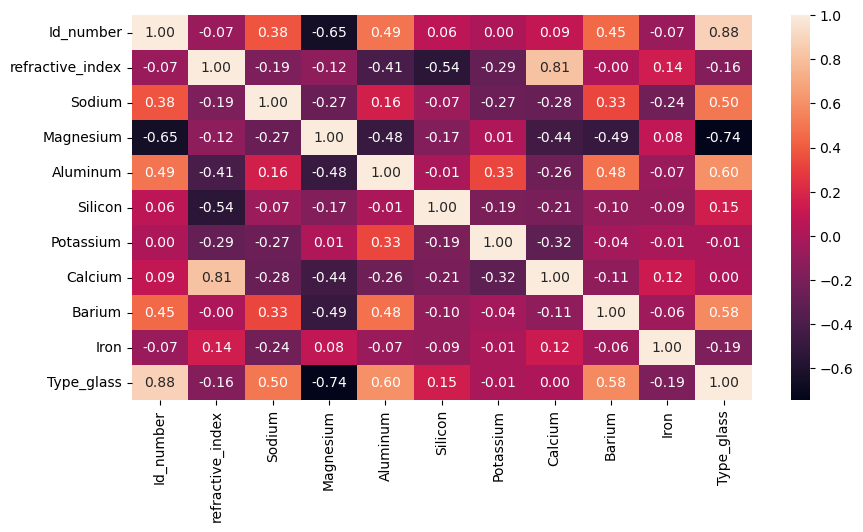

In [294]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [295]:
df.corr()["Type_glass"].sort_values()

Magnesium          -0.744993
Iron               -0.188278
refractive_index   -0.164237
Potassium          -0.010054
Calcium             0.000952
Silicon             0.151565
Sodium              0.502898
Barium              0.575161
Aluminum            0.598829
Id_number           0.877357
Type_glass          1.000000
Name: Type_glass, dtype: float64

Max correlation-0.877357  
Min correlation-0.744993

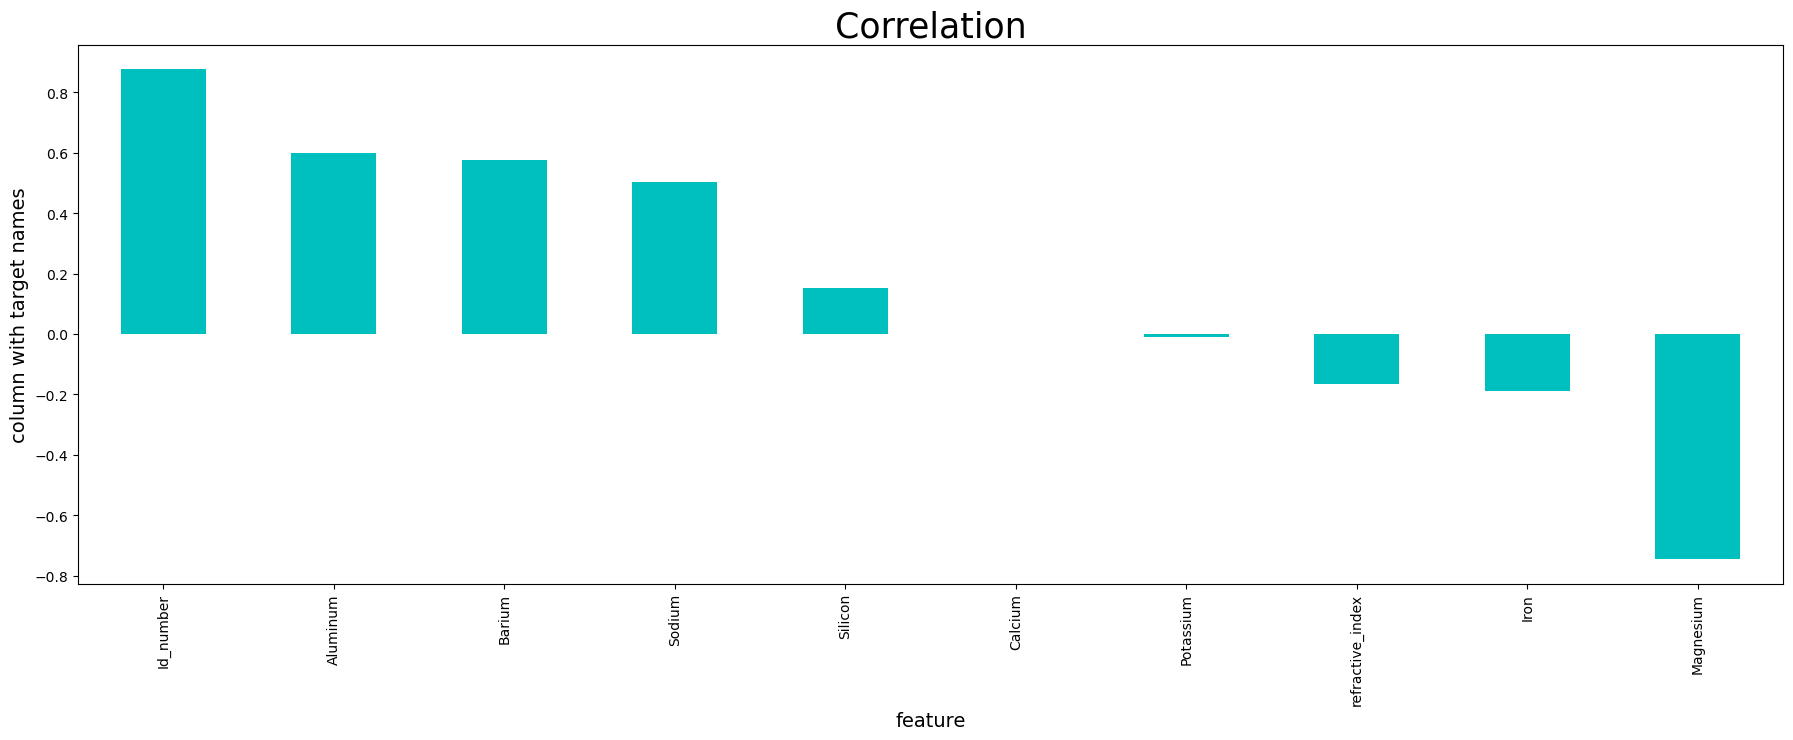

In [296]:
plt.figure(figsize=(22,7))
df.corr()["Type_glass"].sort_values(ascending=False).drop(["Type_glass"]).plot(kind='bar',color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title('Correlation',fontsize=25)
plt.show()

In [297]:
x=df.iloc[:,0:-1]
x

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [298]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type_glass, Length: 214, dtype: int64

# Visualization 

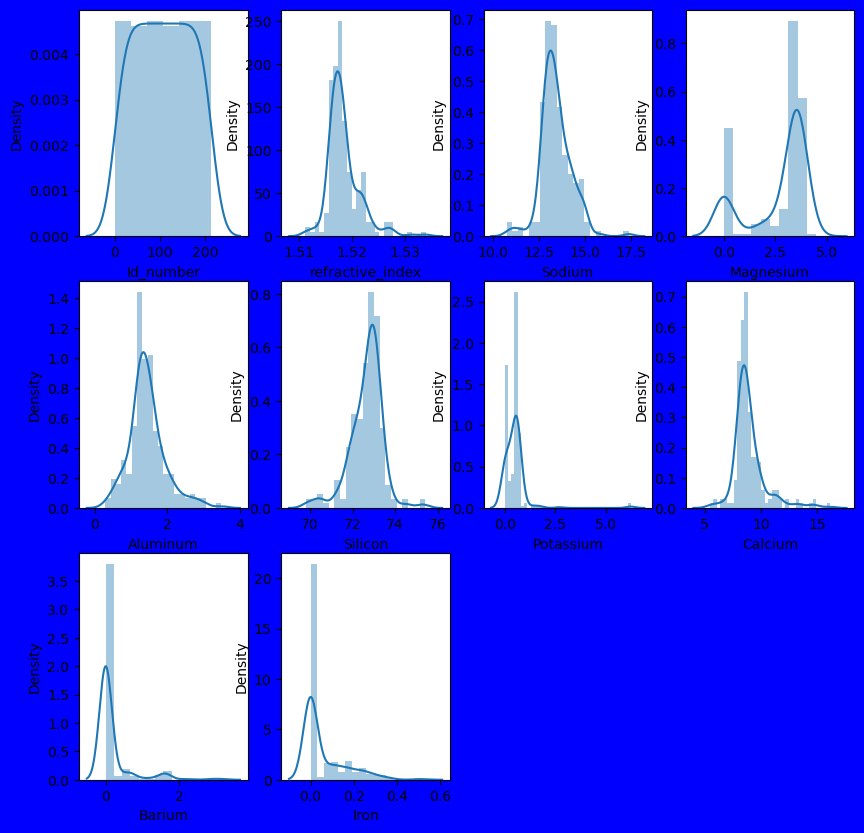

In [299]:
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for i in x:
    if plotnumber <=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

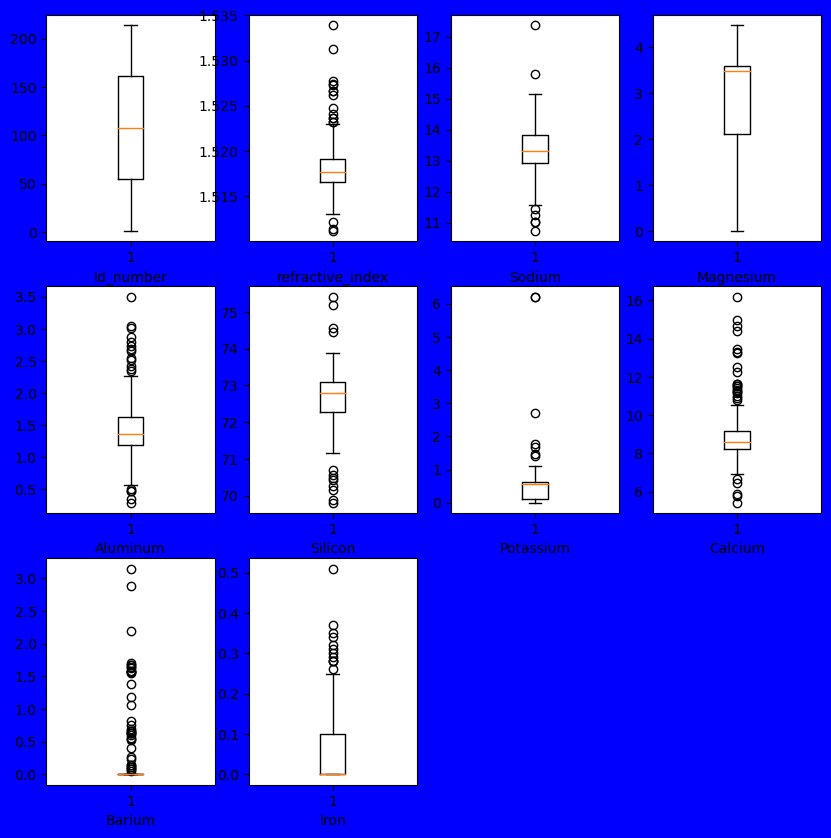

In [300]:
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for i in x:
    if plotnumber <=12:
        ax=plt.subplot(3,4,plotnumber)
        plt.boxplot(x[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [301]:
# x=x.iloc[:,1:]
# x

# Removing outliers with the use of Zscore

In [302]:
# detecting outliers
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
x=z[(z<3).all(axis=1)]
x.shape

(194, 10)

In [303]:

loss= (213-193)/213*100
print(loss)

9.389671361502346


Data lose is under 10 percent.

In [304]:
y=y[(z<3).all(axis=1)]
y.shape

(194,)

# checking skewness of data and Remove with Power Transform.

In [305]:
x.skew()

Id_number           0.045064
refractive_index    1.731212
Sodium              1.315848
Magnesium           1.417559
Aluminum            1.536299
Silicon             1.476892
Potassium           1.551080
Calcium             2.088716
Barium              3.740853
Iron                2.285076
dtype: float64

In [306]:
from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(method="yeo-johnson")
skewed= transform.fit_transform(x)
skewed

array([[ 1.66490635,  0.85309907, -0.65177821, ..., -1.10288911,
        -0.1533432 , -0.17696298],
       [ 1.63609724, -0.70566931,  0.17228529, ...,  0.95124659,
        -0.1533432 , -0.17696298],
       [ 1.60722725,  0.57773682, -1.13991328, ...,  1.01178053,
        -0.1533432 , -0.17696298],
       ...,
       [ 1.57829587,  0.07656624,  1.80330971, ..., -0.03180512,
         2.54336548, -0.17696298],
       [ 1.60722725,  0.64121514,  1.13233487, ..., -0.12944902,
         2.54725391, -0.17696298],
       [ 1.63609724,  0.34800204,  1.162862  , ..., -0.23240778,
         2.54166088, -0.17696298]])

In [307]:
pd.DataFrame(skewed,columns=x.columns).skew().sort_values(ascending=True)

Barium             -0.345349
Iron               -0.225579
Id_number          -0.070834
Magnesium          -0.051332
Silicon             0.041146
Sodium              0.061344
refractive_index    0.062092
Calcium             0.064057
Aluminum            0.158192
Potassium           0.238964
dtype: float64

In [308]:
x=pd.DataFrame(skewed,columns=x.columns)
x.skew().sort_values(ascending=True)

Barium             -0.345349
Iron               -0.225579
Id_number          -0.070834
Magnesium          -0.051332
Silicon             0.041146
Sodium              0.061344
refractive_index    0.062092
Calcium             0.064057
Aluminum            0.158192
Potassium           0.238964
dtype: float64

All skewness is under control 

In [309]:
x

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.664906,0.853099,-0.651778,1.158920,0.497260,1.207464,1.274288,-1.102889,-0.153343,-0.176963
1,1.636097,-0.705669,0.172285,-0.080785,-1.005112,-1.401669,-1.608267,0.951247,-0.153343,-0.176963
2,1.607227,0.577737,-1.139913,-0.181867,-0.915247,-0.170439,-0.487918,1.011781,-0.153343,-0.176963
3,1.578296,-0.768244,-0.793580,0.089797,-0.455641,-1.642224,-0.854476,0.351108,-0.153343,-0.176963
4,1.549303,-0.482186,-1.063956,-0.041655,-0.143456,0.140755,-1.099779,0.612817,-0.153343,-0.176963
...,...,...,...,...,...,...,...,...,...,...
189,1.520247,0.427939,1.147677,1.821688,1.916578,-0.758411,1.422228,-0.190368,1.587807,-0.176963
190,1.549303,0.544808,0.749362,1.821688,1.990604,-1.642224,1.218203,-1.040659,2.436377,-0.176963
191,1.578296,0.076566,1.803310,1.821688,1.063376,0.075358,1.422228,-0.031805,2.543365,-0.176963
192,1.607227,0.641215,1.132335,1.821688,1.126426,1.011485,1.422228,-0.129449,2.547254,-0.176963


In [310]:
sk=x.copy()
sk.skew()

Id_number          -0.070834
refractive_index    0.062092
Sodium              0.061344
Magnesium          -0.051332
Aluminum            0.158192
Silicon             0.041146
Potassium           0.238964
Calcium             0.064057
Barium             -0.345349
Iron               -0.225579
dtype: float64

In [311]:
np.abs(sk)

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.664906,0.853099,0.651778,1.158920,0.497260,1.207464,1.274288,1.102889,0.153343,0.176963
1,1.636097,0.705669,0.172285,0.080785,1.005112,1.401669,1.608267,0.951247,0.153343,0.176963
2,1.607227,0.577737,1.139913,0.181867,0.915247,0.170439,0.487918,1.011781,0.153343,0.176963
3,1.578296,0.768244,0.793580,0.089797,0.455641,1.642224,0.854476,0.351108,0.153343,0.176963
4,1.549303,0.482186,1.063956,0.041655,0.143456,0.140755,1.099779,0.612817,0.153343,0.176963
...,...,...,...,...,...,...,...,...,...,...
189,1.520247,0.427939,1.147677,1.821688,1.916578,0.758411,1.422228,0.190368,1.587807,0.176963
190,1.549303,0.544808,0.749362,1.821688,1.990604,1.642224,1.218203,1.040659,2.436377,0.176963
191,1.578296,0.076566,1.803310,1.821688,1.063376,0.075358,1.422228,0.031805,2.543365,0.176963
192,1.607227,0.641215,1.132335,1.821688,1.126426,1.011485,1.422228,0.129449,2.547254,0.176963


In [312]:
sk[np.abs(sk)<.23].all()

Id_number           True
refractive_index    True
Sodium              True
Magnesium           True
Aluminum            True
Silicon             True
Potassium           True
Calcium             True
Barium              True
Iron                True
dtype: bool

# using VIF for checking multicullinearity

In [313]:
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
Vif['features']=x.columns
Vif

,Vif,features
0,1.425572,Id_number
1,1.463448,refractive_index
2,1.486700,Sodium
3,1.581067,Magnesium
4,1.891393,Aluminum
5,1.237257,Silicon
6,2.264788,Potassium
7,1.411515,Calcium
8,1.610534,Barium
9,1.127512,Iron


In [314]:
# threshold_high=1.5*iqr+q3
# threshold_low=q1-1.5*iqr

In [315]:
# outliers = [x for x in x if x > (q1 - threshold_low) or x < (q3 + threshold_high)]
#outliers = [x for x in x if x < (q1 - threshold_high) or x > (q3 + threshold_low)]

In [316]:
# filtered_data = [x for x in data if x >= (q1 - threshold) and x <= (q3 + threshold)]

In [317]:
# print("Outliers: ", outliers)
# print("Filtered data: ", filtered_data)

# Data Scaling

In [318]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(skewed)
x_scaled

array([[1.        , 0.62295218, 0.27423405, ..., 0.22035103, 0.64496318,
        0.6061527 ],
       [0.99179246, 0.26522417, 0.46973123, ..., 0.69660892, 0.64496318,
        0.6061527 ],
       [0.98356757, 0.55975819, 0.15843104, ..., 0.71064391, 0.64496318,
        0.6061527 ],
       ...,
       [0.97532519, 0.44474254, 0.85666826, ..., 0.46868526, 0.9994888 ,
        0.6061527 ],
       [0.98356757, 0.57432608, 0.69748915, ..., 0.44604621, 1.        ,
        0.6061527 ],
       [0.99179246, 0.50703543, 0.70473128, ..., 0.42217489, 0.99926471,
        0.6061527 ]])

In [319]:
df["Type_glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_glass, dtype: int64

## Using Smote for balancing Target 

In [320]:
import sklearn
print(sklearn.__version__)

1.0.2


In [321]:
import numpy as np
print(np.__version__)

1.21.5


In [322]:
# pip install imbalenced_learn
!pip install imblearn

In [323]:

from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [324]:
trainx,trainy =smt.fit_resample(x_scaled,y)

In [331]:
resamp=pd.DataFrame(trainy)
resamp.value_counts()

Type_glass
1             70
2             70
3             70
5             70
6             70
7             70
dtype: int64

<AxesSubplot: xlabel='Type_glass', ylabel='count'>

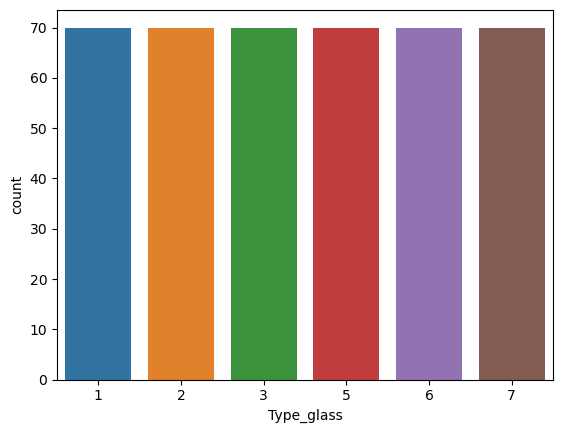

In [327]:
sns.countplot(x='Type_glass', data=resamp)

In [328]:
# # Array of random_state values from -100 to 100
# random_states = np.arange(start=0, stop=100)

# # Initialize a list where we'll store the score of each random_state
# scores = []

# # Initialize search
# while i in random_states:
#     xtrain, ytrain, xtest, ytest = train_test_split(trainx,trainy,test_size=.20, random_state=i)
#     knn=KNeighborsClassifier()
#     knn.fit(x_train,y_train)
#     knn.predict(x_test)
#     sc=knn.score(x_test,y_test)
# scores.append(sc)
   

In [329]:
    #scores.append(knn.score(xtest, ytest))
#     svc = svm.SVC(C=30, gamma='auto')
#     svc.fit(xtrain, ytrain)
#     scores.append(svc.score(xtest, ytest))
# And now put the two arrays in a pandas data frame.
#results = pd.DataFrame({'random_state':random_states,'score':scores})
#results[results['score'] == results['score'].max()]

## Train testing & Prediction 

In [332]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.20,random_state=15)

In [333]:
x_train.shape

(336, 10)

In [334]:
y_train.shape

(336,)

In [335]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.65      0.79        17
           2       1.00      1.00      1.00        10
           3       0.74      1.00      0.85        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        13
           7       0.94      1.00      0.97        16

    accuracy                           0.93        84
   macro avg       0.95      0.94      0.93        84
weighted avg       0.94      0.93      0.93        84



In [336]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [337]:
pred=mnb.predict(x_test)
pred

array([7, 2, 2, 5, 7, 3, 2, 6, 7, 7, 3, 5, 7, 5, 1, 7, 7, 6, 3, 3, 1, 6,
       5, 7, 5, 2, 2, 7, 1, 2, 1, 5, 6, 5, 7, 5, 7, 3, 6, 2, 3, 7, 5, 6,
       3, 7, 7, 6, 3, 5, 5, 3, 2, 3, 6, 6, 3, 7, 6, 6, 3, 6, 1, 5, 7, 2,
       7, 7, 7, 2, 7, 6, 1, 6, 3, 7, 3, 3, 2, 5, 7, 5, 5, 2], dtype=int64)

In [338]:
mnb.score(x_train,y_train)

0.8035714285714286

In [339]:
print(confusion_matrix(y_test,pred))

[[ 5  2  4  1  0  5]
 [ 0 10  0  0  0  0]
 [ 1  0 11  0  1  1]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 16]]


In [340]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.83      0.29      0.43        17
           2       0.83      1.00      0.91        10
           3       0.73      0.79      0.76        14
           5       0.93      1.00      0.97        14
           6       0.93      1.00      0.96        13
           7       0.73      1.00      0.84        16

    accuracy                           0.82        84
   macro avg       0.83      0.85      0.81        84
weighted avg       0.83      0.82      0.79        84



In [341]:
dtc = DecisionTreeClassifier(random_state=15)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=15)

In [342]:
pred=dtc.predict(x_test)
pred

array([7, 2, 2, 5, 1, 3, 2, 6, 7, 1, 3, 5, 3, 5, 1, 1, 7, 6, 3, 3, 1, 6,
       5, 7, 5, 1, 2, 7, 1, 2, 1, 5, 6, 5, 1, 5, 7, 1, 6, 1, 3, 7, 5, 6,
       3, 7, 7, 6, 3, 5, 5, 3, 2, 7, 6, 6, 3, 7, 6, 6, 3, 3, 3, 5, 7, 3,
       7, 1, 7, 2, 7, 6, 1, 6, 3, 7, 1, 1, 2, 5, 7, 5, 5, 2], dtype=int64)

In [343]:
dtc.score(x_train,y_train)

1.0

In [344]:
print(confusion_matrix(y_test,pred))

[[14  0  1  1  0  1]
 [ 1  9  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 16]]


In [345]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.93      0.82      0.87        17
           2       1.00      0.90      0.95        10
           3       0.93      1.00      0.97        14
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        13
           7       0.94      1.00      0.97        16

    accuracy                           0.95        84
   macro avg       0.96      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



In [346]:
cross_val= cross_val_score(dtc,trainx,trainy,cv=5)
print(cross_val)
print(cross_val.mean)
print(cross_val.std())

[0.92857143 0.97619048 0.97619048 0.91666667 0.83333333]
<built-in method mean of numpy.ndarray object at 0x000001B7E7B28C90>
0.05238095238095236


In [347]:
knn.score(x_test, y_test)

0.9285714285714286

In [348]:
dtc.score(x_test, y_test)


0.9523809523809523

In [349]:
mnb.score(x_test, y_test)

0.8214285714285714

In [350]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [351]:
pred=knn.predict(x_test)
pred

array([7, 2, 2, 5, 1, 3, 2, 6, 7, 7, 3, 5, 3, 5, 1, 1, 7, 6, 3, 3, 1, 6,
       1, 7, 5, 2, 2, 7, 1, 2, 1, 5, 6, 5, 1, 5, 7, 1, 6, 1, 3, 7, 5, 6,
       3, 7, 7, 6, 3, 5, 5, 3, 2, 3, 6, 6, 3, 7, 6, 6, 3, 3, 3, 5, 7, 1,
       7, 1, 7, 2, 7, 6, 1, 6, 3, 7, 3, 3, 2, 5, 7, 5, 5, 2], dtype=int64)

In [352]:
knn.score(x_train,y_train)

0.9404761904761905

In [353]:
print(confusion_matrix(y_test,pred))

[[13  0  3  0  0  1]
 [ 0 10  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 16]]


In [354]:
cross_val= cross_val_score(knn,trainx,trainy,cv=5)
print(cross_val)
print(cross_val.mean())
print(cross_val.std())

[0.92857143 0.96428571 0.92857143 0.82142857 0.86904762]
0.9023809523809522
0.05073160893491077


# Grid search Cv for DTC &SVC 

In [355]:
dtc=DecisionTreeClassifier
grid_param={"criterion":["Gini","entropy"]}
clf = GridSearchCV(DecisionTreeClassifier(), grid_param, cv=5)
clf.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['Gini', 'entropy']})

In [356]:
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'criterion': 'entropy'}
0.9023809523809524
DecisionTreeClassifier(criterion='entropy')


In [357]:
grid_predictions = clf.predict(x_test)
grid_predictions

array([7, 2, 2, 5, 1, 3, 2, 6, 7, 1, 3, 5, 3, 5, 1, 1, 7, 6, 3, 3, 1, 6,
       1, 7, 5, 2, 2, 7, 1, 2, 1, 5, 6, 5, 1, 5, 7, 1, 6, 1, 3, 7, 5, 6,
       3, 7, 7, 6, 3, 5, 5, 3, 2, 1, 6, 6, 3, 7, 6, 6, 3, 3, 3, 5, 7, 1,
       7, 1, 7, 2, 7, 6, 1, 6, 3, 7, 1, 1, 2, 5, 7, 5, 5, 2], dtype=int64)

In [358]:
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        16

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [359]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C':[0.1, 1, 10, 100,1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
print(clf.best_params_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [360]:
param_grid = {'C': [100], 'gamma': [1], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)            

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.985 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [100], 'gamma': [1], 'kernel': ['rbf']},
             verbose=3)

In [361]:
grid_predictions = grid.predict(x_test)
  
grid_predictions

array([7, 2, 2, 5, 1, 3, 2, 6, 7, 7, 3, 5, 3, 5, 2, 1, 7, 6, 3, 3, 1, 6,
       1, 7, 5, 2, 2, 7, 1, 2, 1, 5, 6, 5, 1, 5, 7, 1, 6, 1, 3, 7, 5, 6,
       3, 7, 7, 6, 3, 5, 5, 3, 2, 1, 6, 6, 3, 7, 6, 6, 3, 3, 3, 5, 7, 3,
       7, 1, 7, 2, 7, 6, 1, 6, 3, 7, 1, 1, 2, 5, 7, 5, 5, 2], dtype=int64)

In [362]:
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        17
           2       0.91      1.00      0.95        10
           3       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        13
           7       0.94      1.00      0.97        16

    accuracy                           0.96        84
   macro avg       0.96      0.97      0.97        84
weighted avg       0.97      0.96      0.96        84



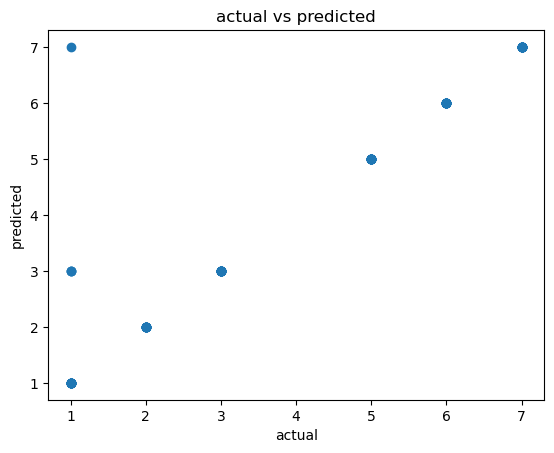

In [363]:
#prediction through graph
plt.scatter(y_test,pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
plt.show()

In [364]:
#for saving the file
import joblib
joblib.dump(knn,"Glass_Identification_Dataset.obj")

['Glass_Identification_Dataset.obj']

# Finish